In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
with open('/home/ahojel/visual_prompting_vid/output_dir/improv_injection/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data = data[1:]
data = [eval(line.strip()) for line in data]

In [4]:
# Create a DataFrame
df = pd.DataFrame(data)

In [5]:
df[df["lambda"].isna()]

,query_name,support_name,task,lambda,metric,iou,accuracy,r_metric,r_iou,r_accuracy,all_layers
32,2007_000042,2007_007168,label_colorization,NaN,0.060584,NaN,NaN,NaN,NaN,NaN,NaN
65,2007_000042,2007_007168,label_lowlight enhance,NaN,0.074877,NaN,NaN,NaN,NaN,NaN,NaN
98,2007_000042,2007_007168,label_inpaint single random,NaN,0.056456,NaN,NaN,NaN,NaN,NaN,NaN
131,2007_000123,2008_006553,label_segmentation,NaN,0.388826,0.000000,0.604253,NaN,NaN,NaN,NaN
164,2007_000123,2008_006553,label_colorization,NaN,0.061870,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
55604,2007_007203,2009_003857,label_colorization,NaN,0.058351,NaN,NaN,NaN,NaN,NaN,NaN
55637,2007_007203,2009_003857,label_lowlight enhance,NaN,0.061270,NaN,NaN,NaN,NaN,NaN,NaN
55670,2007_007203,2009_003857,label_inpaint single random,NaN,0.061891,NaN,NaN,NaN,NaN,NaN,NaN
55703,2007_007417,2009_004099,label_segmentation,NaN,0.794108,0.021348,0.192598,NaN,NaN,NaN,NaN


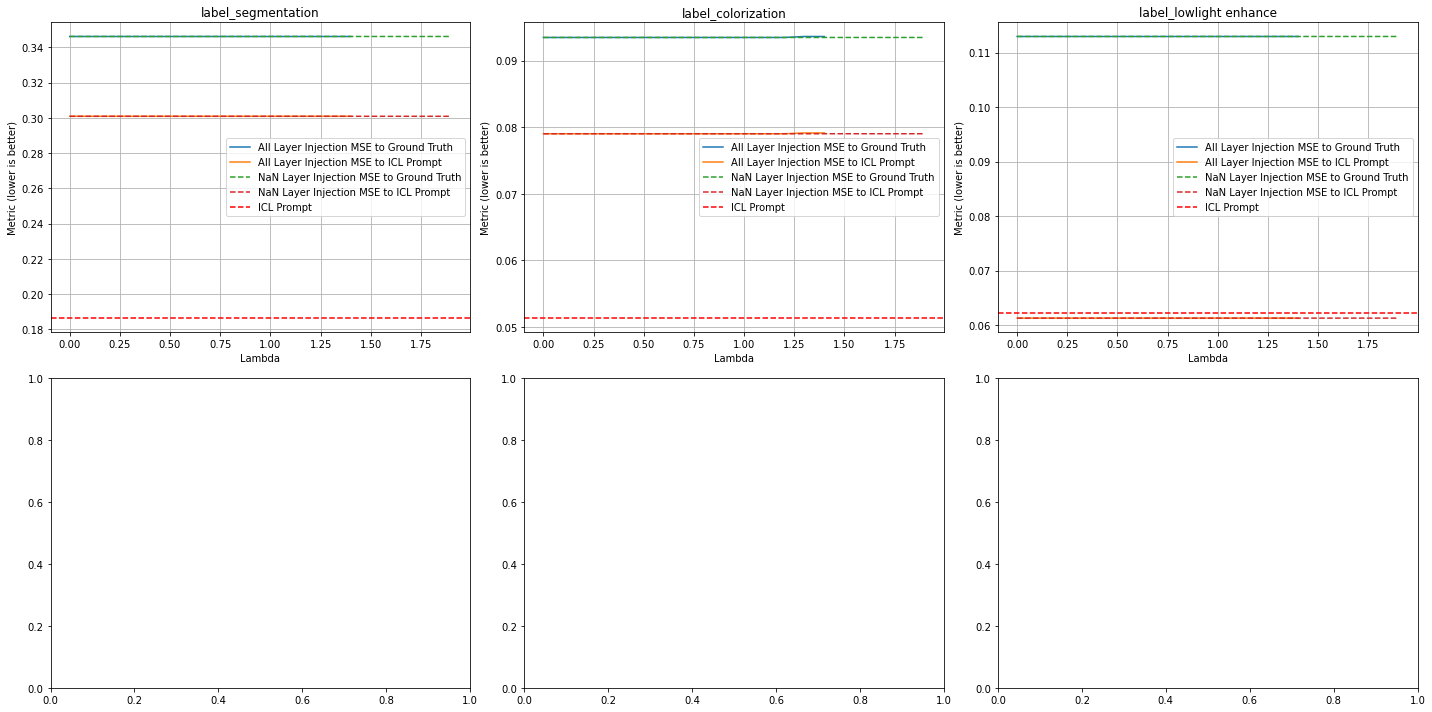

In [8]:
unique_tasks = df['task'].unique()
unique_tasks = ['label_segmentation', 'label_colorization', 'label_lowlight enhance']

# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols

    # Filter the dataframe for the current task and group by 'lambda' and 'vector'
    df_task = df[(df['task'] == task)]
    df_baseline = df[df['task'] == task]

    # Separate dataframes for all_layer True and NaN
    df_task_all_layer = df_task[df_task['all_layers'] == True]
    df_task_nan_layer = df_task[df_task['all_layers'].isna()]

    # Group by 'lambda' and 'all_layer', then calculate the mean for each group
    grouped_data_all_layer = df_task_all_layer.groupby(['lambda'])[['metric', 'r_metric']].mean().reset_index()
    grouped_data_nan_layer = df_task_nan_layer.groupby(['lambda'])[['metric', 'r_metric']].mean().reset_index()

    # Convert to numpy arrays before plotting
    lambda_values_all_layer = grouped_data_all_layer['lambda'].to_numpy()
    metric_values_all_layer = grouped_data_all_layer['metric'].to_numpy()
    r_metric_values_all_layer = grouped_data_all_layer['r_metric'].to_numpy()

    lambda_values_nan_layer = grouped_data_nan_layer['lambda'].to_numpy()
    metric_values_nan_layer = grouped_data_nan_layer['metric'].to_numpy()
    r_metric_values_nan_layer = grouped_data_nan_layer['r_metric'].to_numpy()

    # Plot the 'metric' and 'r_metric' for the selected layers
    axes[row, col].plot(lambda_values_all_layer, metric_values_all_layer, label='All Layer Injection MSE to Ground Truth')
    axes[row, col].plot(lambda_values_all_layer, r_metric_values_all_layer, label='All Layer Injection MSE to ICL Prompt')
    axes[row, col].plot(lambda_values_nan_layer, metric_values_nan_layer, '--', label='NaN Layer Injection MSE to Ground Truth')
    axes[row, col].plot(lambda_values_nan_layer, r_metric_values_nan_layer, '--', label='NaN Layer Injection MSE to ICL Prompt')

    # Add a legend to the plot
    lines, labels = axes[row, col].get_legend_handles_labels()
    axes[row, col].legend(lines, labels, loc=0)
    baseline = df_baseline[df_baseline['lambda'].isna()]["metric"].mean()
    axes[row, col].axhline(y=baseline, color='red', linestyle='--', label='ICL Prompt')
    
    axes[row, col].set_title(task)
    axes[row, col].set_xlabel('Lambda')
    axes[row, col].set_ylabel('Metric (lower is better)')
    axes[row, col].legend()
    axes[row, col].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [12]:
df

,query_name,support_name,task,lambda,metric,iou,accuracy,r_metric,r_iou,r_accuracy,all_layers
0,2007_000042,2007_007168,label_segmentation,0.0,0.269860,0.355984,0.520006,0.318483,0.060428,0.546952,NaN
1,2007_000042,2007_007168,label_segmentation,0.4,0.269859,0.356093,0.520088,0.318482,0.060417,0.546871,NaN
2,2007_000042,2007_007168,label_segmentation,0.5,0.269859,0.356093,0.520088,0.318482,0.060417,0.546871,NaN
3,2007_000042,2007_007168,label_segmentation,0.6,0.269860,0.355984,0.520006,0.318482,0.060606,0.547115,NaN
4,2007_000042,2007_007168,label_segmentation,0.7,0.269859,0.356093,0.520088,0.318482,0.060417,0.546871,NaN
...,...,...,...,...,...,...,...,...,...,...,...
55762,2007_007417,2009_004099,label_colorization,0.8,0.030879,NaN,NaN,0.029289,NaN,NaN,True
55763,2007_007417,2009_004099,label_colorization,0.9,0.030879,NaN,NaN,0.029289,NaN,NaN,True
55764,2007_007417,2009_004099,label_colorization,1.0,0.030880,NaN,NaN,0.029289,NaN,NaN,True
55765,2007_007417,2009_004099,label_colorization,1.1,0.030879,NaN,NaN,0.029289,NaN,NaN,True


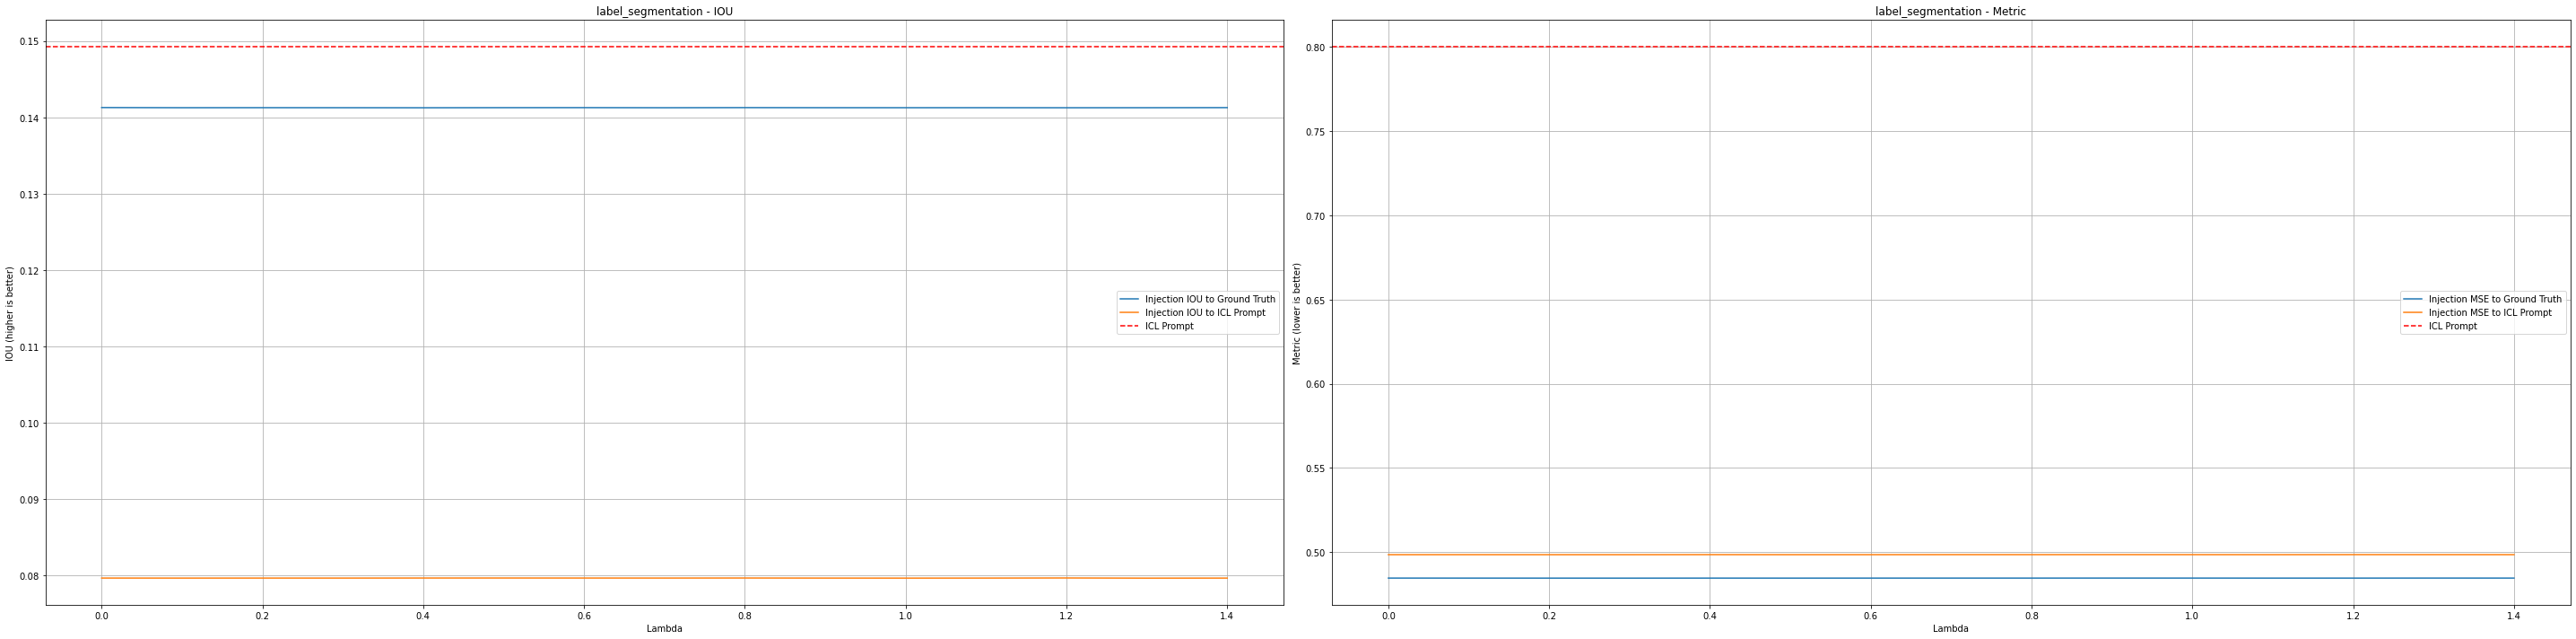

In [15]:
# Set the task to 'label_segmentation'
task = 'label_segmentation'

# Setting up the grid for plotting - only one row and two columns
num_rows = 1
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 10))

# Filter the dataframe for the current task and group by 'lambda' and 'vector'
df_task = df[(df['task'] == task)&(df['all_layers'] == True)]

# Group by 'lambda' and 'all_layers', then calculate the mean for each group
grouped_data_iou = df_task.groupby('lambda')[['iou', 'r_iou']].mean().reset_index()
grouped_data_metric = df_task.groupby('lambda')[['accuracy', 'r_accuracy']].mean().reset_index()

# Convert to numpy arrays before plotting
lambda_values_iou = grouped_data_iou['lambda'].to_numpy()
iou_values = grouped_data_iou['iou'].to_numpy()
r_iou_values = grouped_data_iou['r_iou'].to_numpy()

lambda_values_metric = grouped_data_metric['lambda'].to_numpy()
metric_values = grouped_data_metric['accuracy'].to_numpy()
r_metric_values = grouped_data_metric['r_accuracy'].to_numpy()

# Plot the 'iou' and 'r_iou' for the selected layers
axes[0].plot(lambda_values_iou, iou_values, label='Injection IOU to Ground Truth')
axes[0].plot(lambda_values_iou, r_iou_values, label='Injection IOU to ICL Prompt')

# Add a legend to the plot
axes[0].legend(loc=0)
baseline_iou = df_baseline[df_baseline['lambda'].isna()]["iou"].mean()
axes[0].axhline(y=baseline_iou, color='red', linestyle='--', label='ICL Prompt')

axes[0].set_title(task + ' - IOU')
axes[0].set_xlabel('Lambda')
axes[0].set_ylabel('IOU (higher is better)')
axes[0].legend()
axes[0].grid(True)

# Plot the 'metric' and 'r_metric' for the selected layers
axes[1].plot(lambda_values_metric, metric_values, label='Injection MSE to Ground Truth')
axes[1].plot(lambda_values_metric, r_metric_values, label='Injection MSE to ICL Prompt')

# Add a legend to the plot
axes[1].legend(loc=0)
baseline_metric = df_baseline[df_baseline['lambda'].isna()]["accuracy"].mean()
axes[1].axhline(y=baseline_metric, color='red', linestyle='--', label='ICL Prompt')

axes[1].set_title(task + ' - Metric')
axes[1].set_xlabel('Lambda')
axes[1].set_ylabel('Metric (lower is better)')
axes[1].legend()
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


KeyError: 'layer'

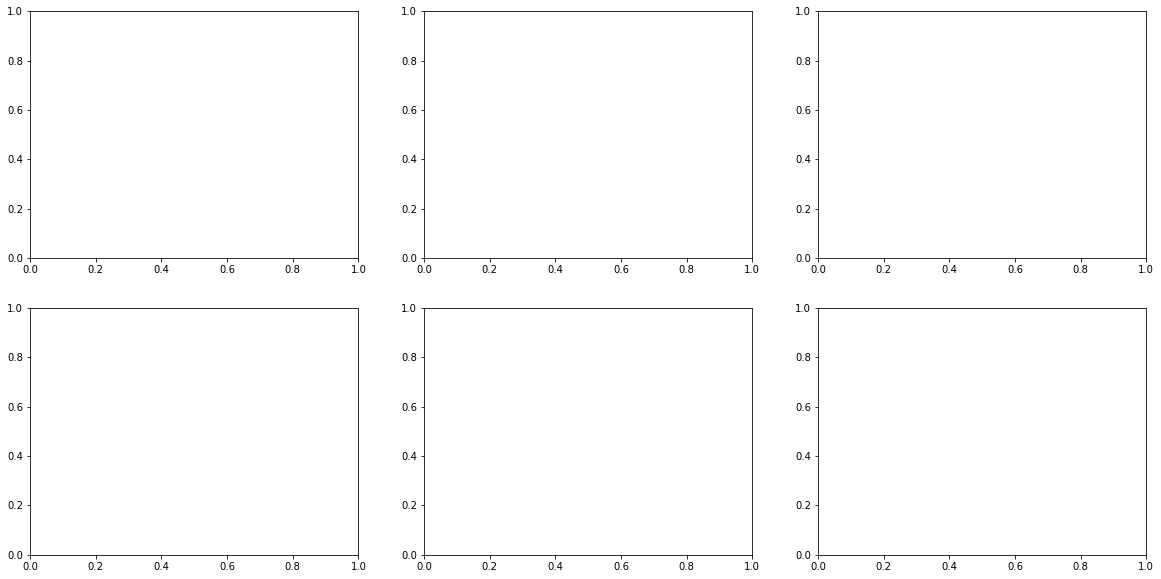

In [18]:
unique_tasks = df['task'].unique()
# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols

    # Filter the dataframe for the current task
    df_task = df[df['task'] == task]

    # For each unique layer, find the lambda that minimizes the metric for each 'query_name' and 'support_name' combination
    best_lambdas = df_task.groupby(['query_name', 'support_name', 'layer'])['metric'].idxmin()
    best_lambda_data = df_task.loc[best_lambdas]

    # Group by 'layer' and calculate the mean metric for the best lambdas
    grouped_data = best_lambda_data.groupby('layer')['metric'].mean().reset_index()

    # Convert to numpy arrays before plotting
    layer_values = grouped_data['layer'].to_numpy()
    metric_values = grouped_data['metric'].to_numpy()

    # Plot the average metric for the best lambdas
    axes[row, col].plot(layer_values, metric_values, label='Average Metric for Best Lambda')

    # Calculate and plot the baseline
    baseline = df_task[df_task['lambda'].isna()]["metric"].mean()
    axes[row, col].axhline(y=baseline, color='red', linestyle='--', label='Baseline')

    # Add a legend to the plot
    axes[row, col].legend()
    axes[row, col].set_title(task)
    axes[row, col].set_xlabel('Layer')
    axes[row, col].set_ylabel('Metric (lower is better)')
    axes[row, col].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

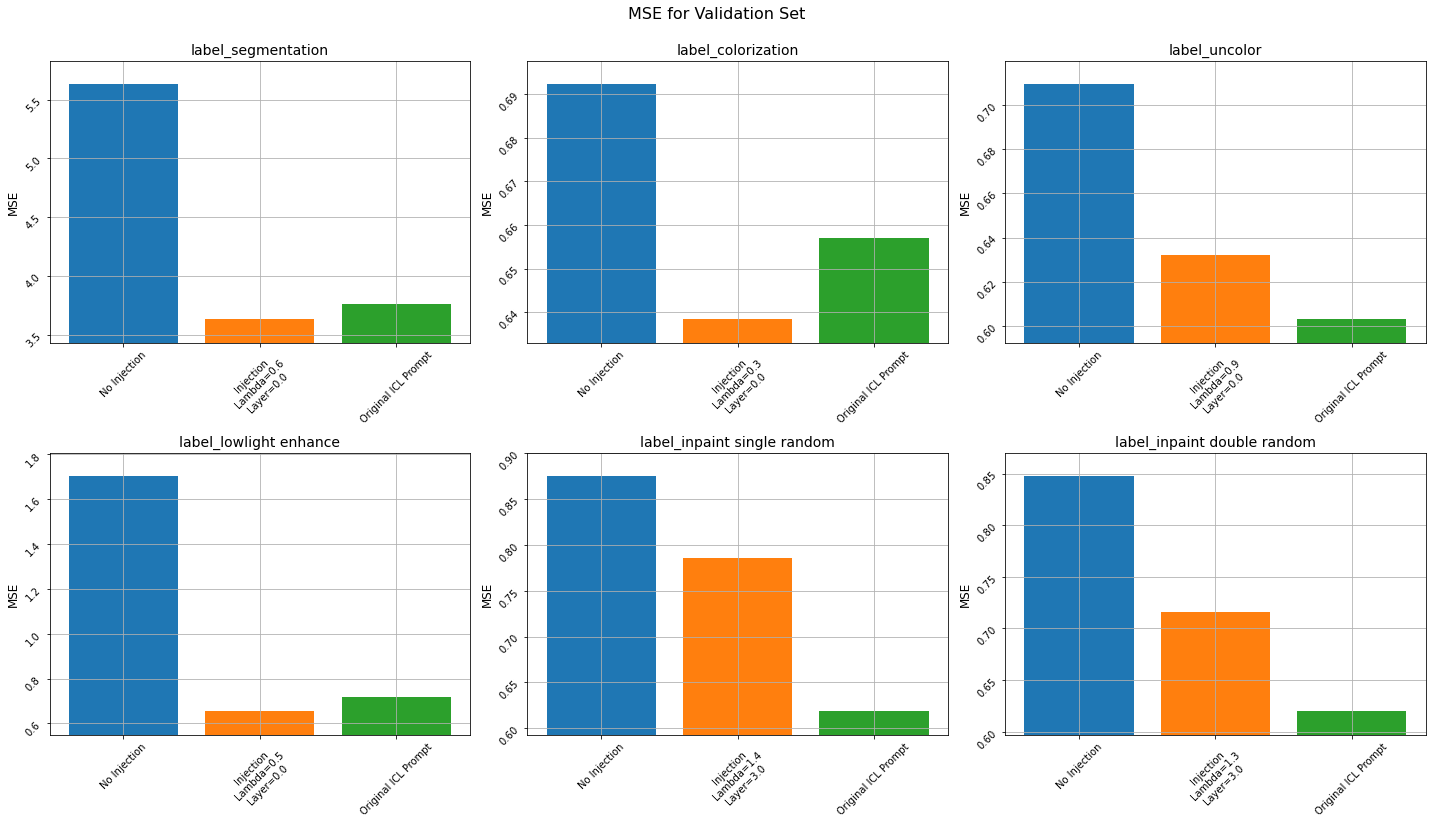

In [19]:
unique_tasks = df['task'].unique()
# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 12))  # Adjusted for more space

# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    row = i // num_cols
    col = i % num_cols
    df_task = df[df['task'] == task]
    grouped_data = df_task.groupby(['lambda', 'layer'])[['metric',"r_metric"]].mean().reset_index()

    lambda_zero_metric = grouped_data[grouped_data['lambda'] == 0]['metric'].mean()
    baseline_metric = df_task[df_task['lambda'].isna()]["metric"].mean()
    best_lambda_layer_index = grouped_data['metric'].idxmin()
    best_lambda = grouped_data.loc[best_lambda_layer_index, 'lambda']
    best_layer = grouped_data.loc[best_lambda_layer_index, 'layer']
    best_lambda_layer_metric = grouped_data.loc[best_lambda_layer_index, 'metric']

    bar_labels = ['No Injection', f'Injection\nLambda={best_lambda:.1f}\nLayer={best_layer}', 'Original ICL Prompt']
    bar_values = [lambda_zero_metric, best_lambda_layer_metric, baseline_metric]
    axes[row, col].bar(bar_labels, bar_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])  # Example colors

    axes[row, col].set_title(task, fontsize=14)
    axes[row, col].set_ylabel('MSE', fontsize=12)
    axes[row, col].grid(True)
    axes[row, col].tick_params(labelrotation=45, labelsize=10)
    axes[row, col].set_ylim([min(bar_values)-0.1*(max(bar_values) - min(bar_values)), max(bar_values)+0.1*(max(bar_values) - min(bar_values))])  # Rotate labels and adjust size

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit subplots
fig.suptitle("MSE for Validation Set", fontsize=16)
plt.show()


/tmp/ipykernel_1381987/3060289324.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table_single = pivot_table_single.applymap(lambda x: np.nan if x > baseline_metric else x)
/tmp/ipykernel_1381987/3060289324.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table_double = pivot_table_double.applymap(lambda x: np.nan if x > baseline_metric else x)
/tmp/ipykernel_1381987/3060289324.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table_single = pivot_table_single.applymap(lambda x: np.nan if x > baseline_metric else x)
/tmp/ipykernel_1381987/3060289324.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table_double = pivot_table_double.applymap(lambda x: np.nan if x > baseline_metric else x)
/tmp/ipykernel_1381987/3060289324.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.ma

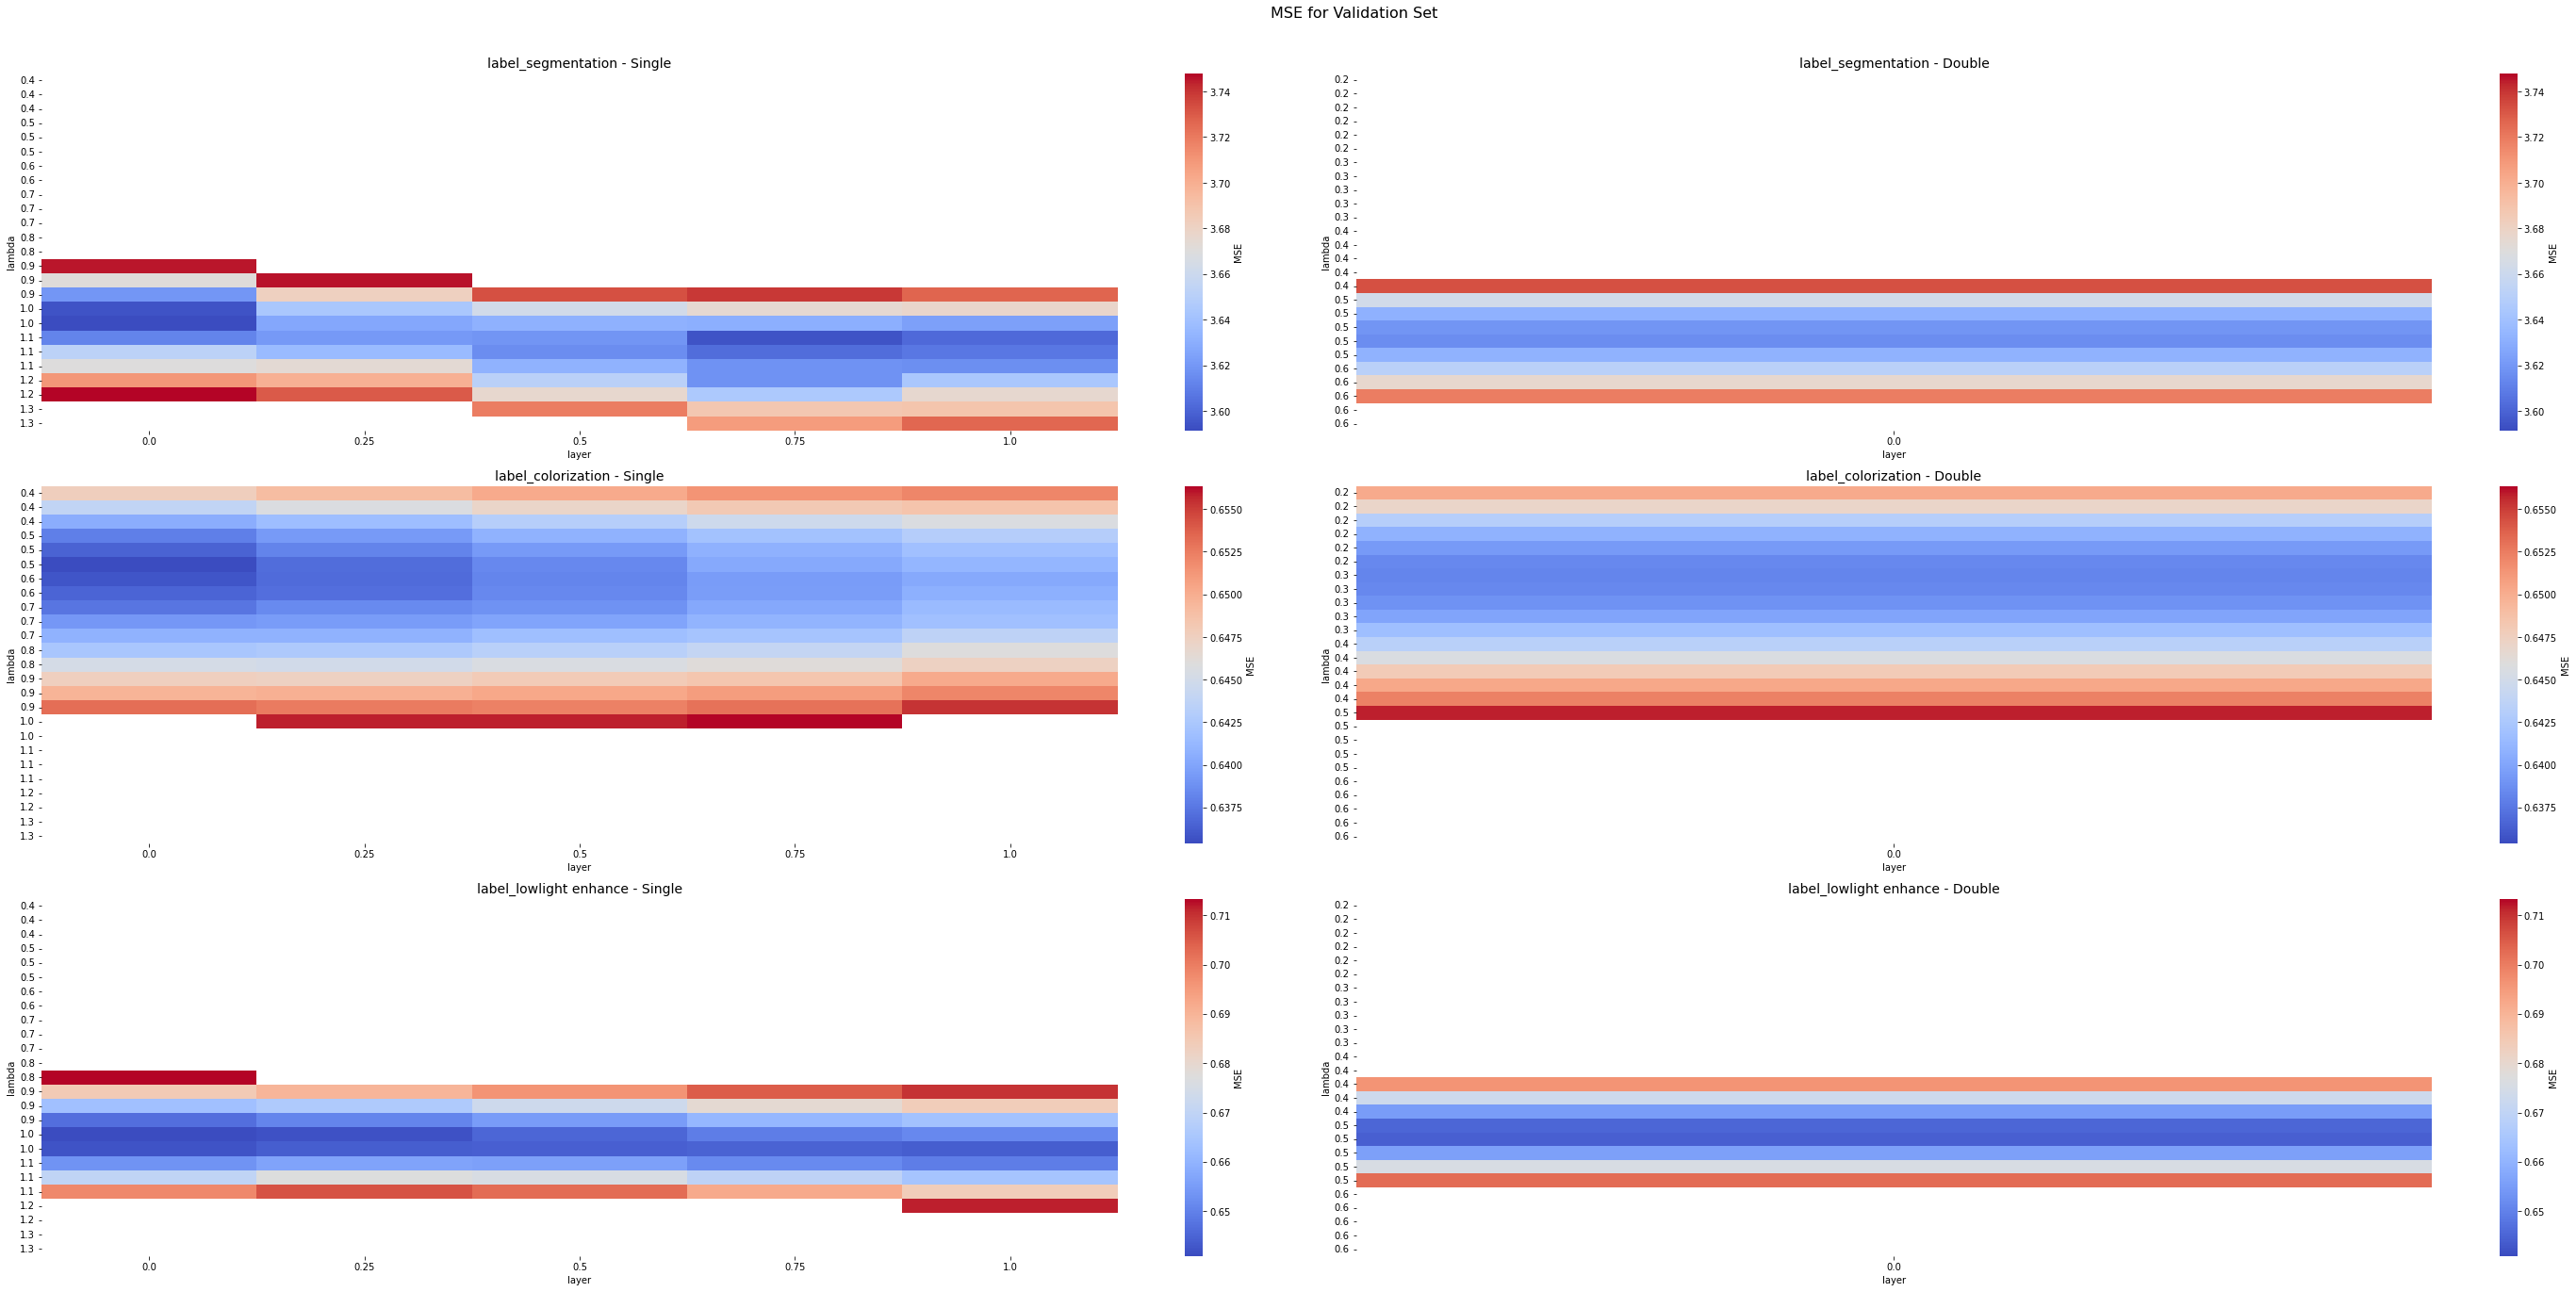

In [48]:
unique_tasks = ['label_segmentation', 'label_colorization', 'label_lowlight enhance']
# Setting up the grid for plotting - assuming there are 3 unique tasks
num_rows = 3
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 20))  # Adjusted for more space

# Iterating over each task and creating a heatmap
for i, task in enumerate(unique_tasks):
    df_task_single = df[(df['task'] == task) & (df['style'] == 'single')]
    df_task_double = df[(df['task'] == task) & (df['style'] == 'double')]
    df_baseline = df[df['task'] == task]

    pivot_table_single = df_task_single.pivot_table(index='lambda', columns='layer', values='metric')
    pivot_table_double = df_task_double.pivot_table(index='lambda', columns='layer', values='metric')

    # Get the baseline metric for the task
    
    baseline_metric = df_baseline[df_baseline['lambda'].isna()]["metric"].mean()

    # Set cells with worse performance than the baseline to a large value
    pivot_table_single = pivot_table_single.applymap(lambda x: np.nan if x > baseline_metric else x)
    pivot_table_double = pivot_table_double.applymap(lambda x: np.nan if x > baseline_metric else x)

    # Get the minimum and maximum metric values across both single and double styles for consistent colorscale
    vmin = min(pivot_table_single.min().min(), pivot_table_double.min().min())
    vmax = max(pivot_table_single.max().max(), pivot_table_double.max().max())

    # Plotting the heatmap
    sns.heatmap(pivot_table_single, ax=axes[i, 0], cmap='coolwarm', cbar_kws={'label': 'MSE'}, vmin=vmin, vmax=vmax, mask=pivot_table_single.isnull())
    sns.heatmap(pivot_table_double, ax=axes[i, 1], cmap='coolwarm', cbar_kws={'label': 'MSE'}, vmin=vmin, vmax=vmax, mask=pivot_table_double.isnull())

    axes[i, 0].set_title(f"{task} - Single", fontsize=14)
    axes[i, 1].set_title(f"{task} - Double", fontsize=14)

    y_labels_single = axes[i, 0].get_yticklabels()
    y_labels_double = axes[i, 1].get_yticklabels()

    axes[i, 0].set_yticklabels([label.get_text()[:3] for label in y_labels_single])  # Show only first 3 sig figs in lambda y axis
    axes[i, 1].set_yticklabels([label.get_text()[:3] for label in y_labels_double])  # Show only first 3 sig figs in lambda y axis

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit subplots
fig.suptitle("MSE for Validation Set", fontsize=16)
plt.show()


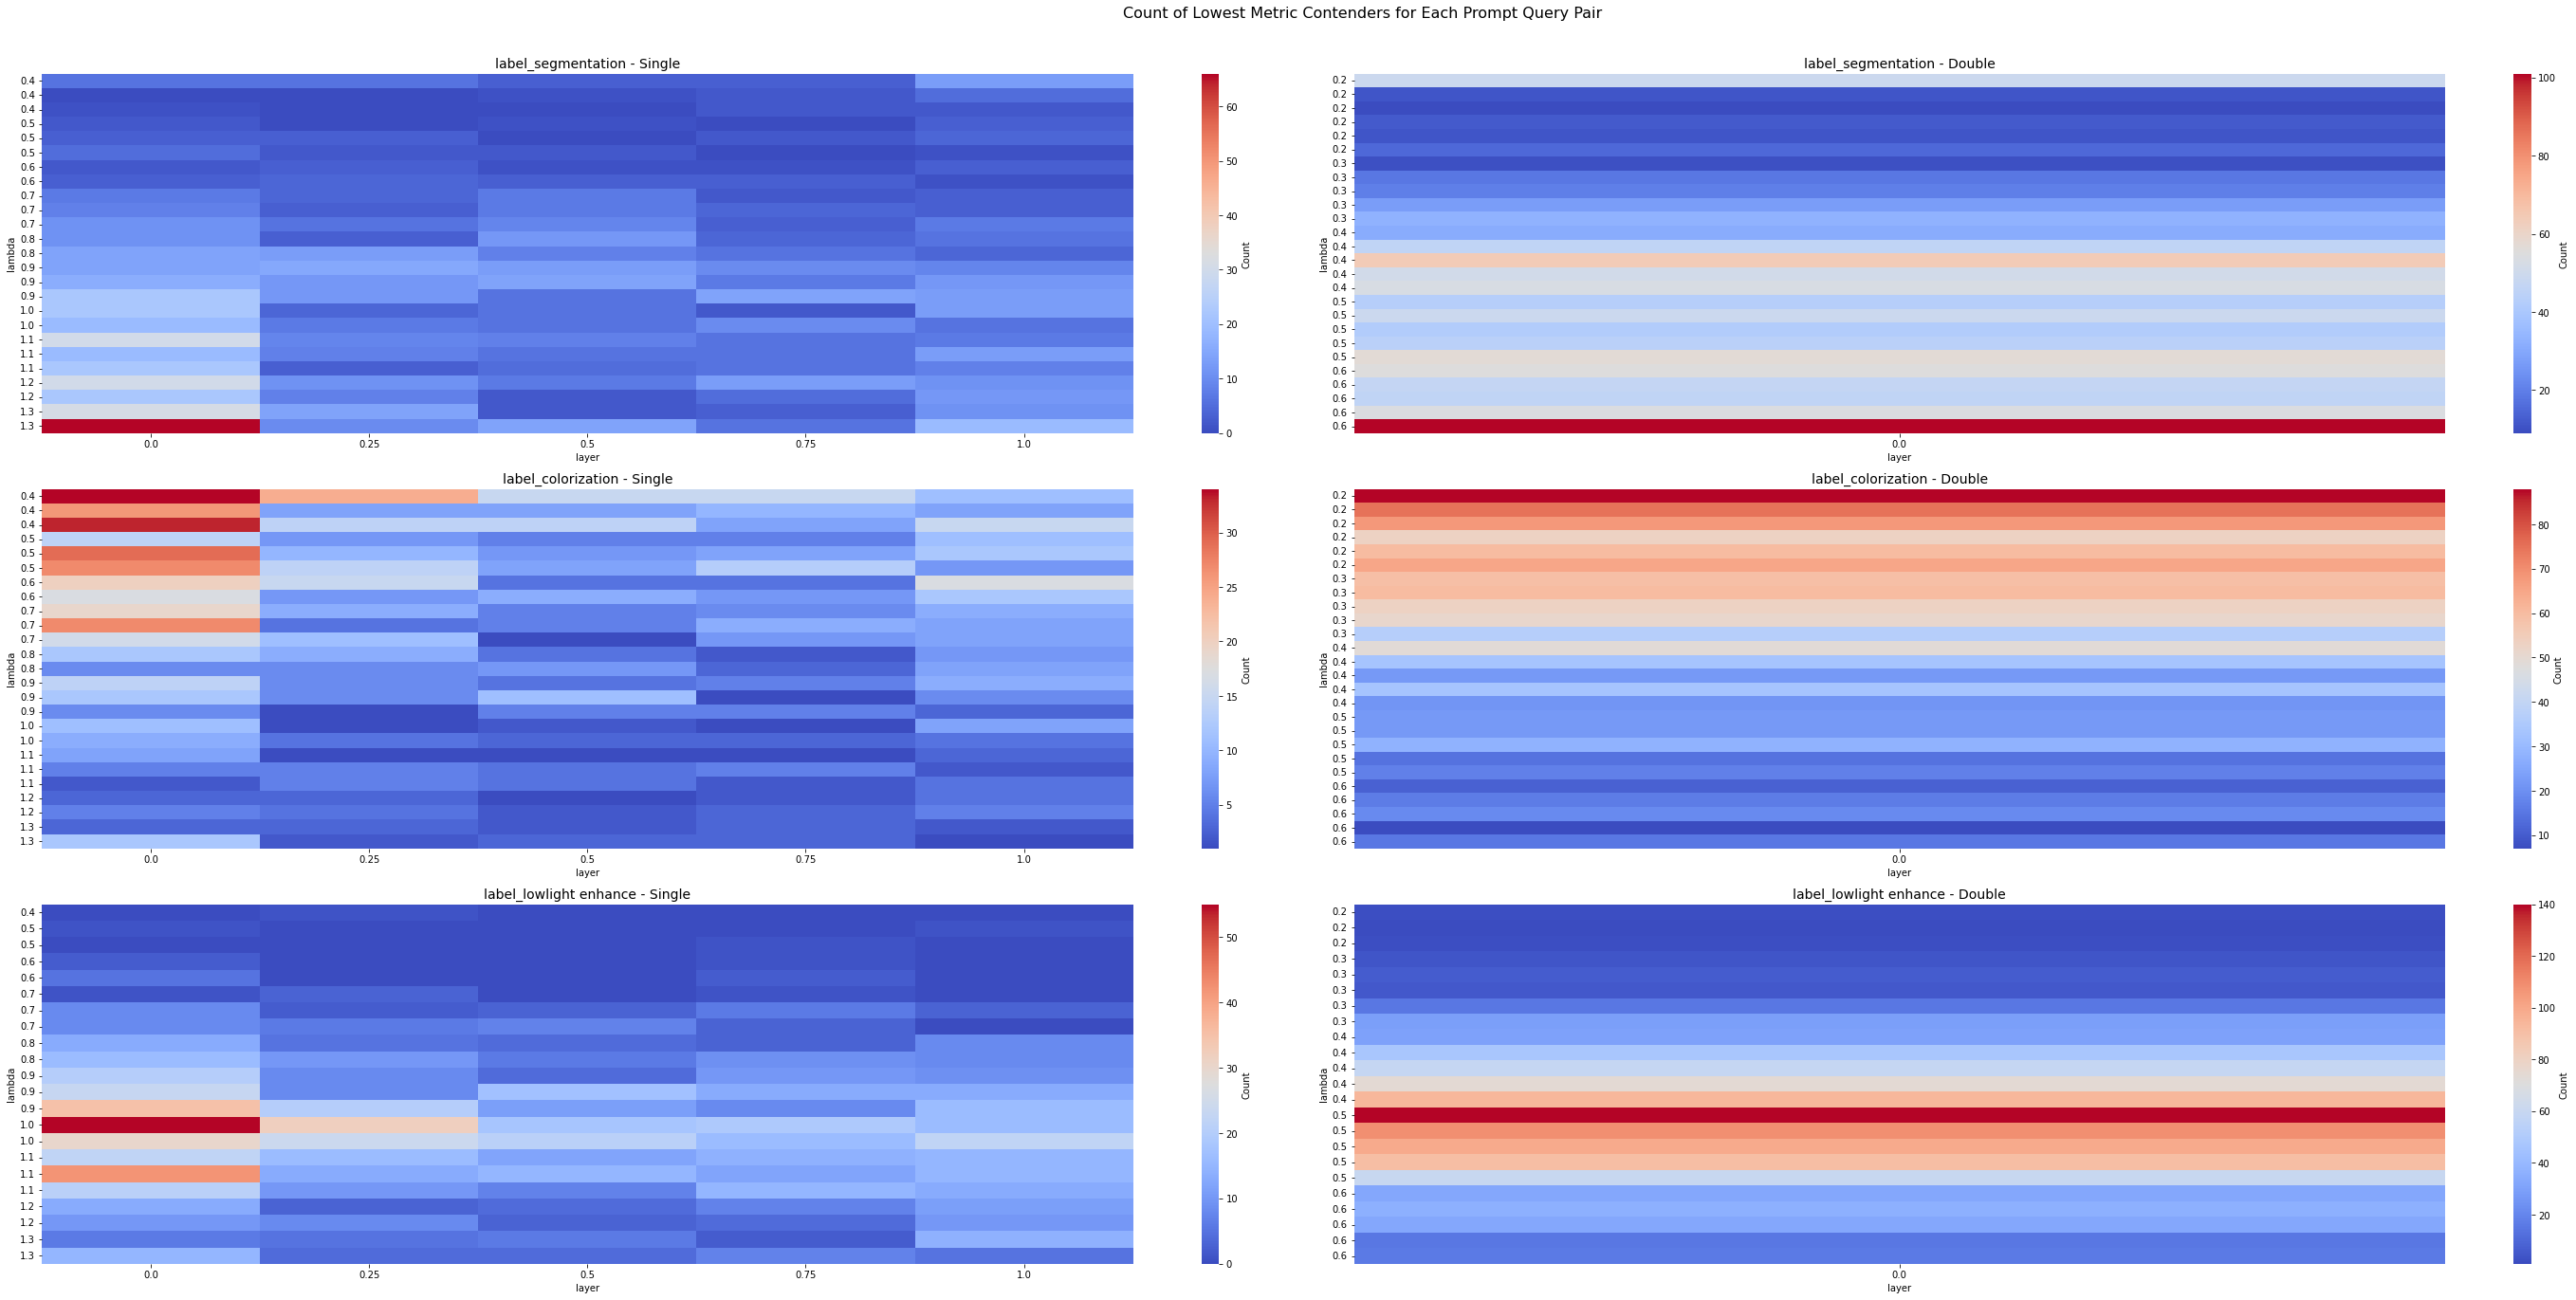

In [49]:
unique_tasks = ['label_segmentation', 'label_colorization', 'label_lowlight enhance']
# Setting up the grid for plotting - assuming there are 3 unique tasks
num_rows = 3
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 20))  # Adjusted for more space

# Iterating over each task and creating a heatmap
for i, task in enumerate(unique_tasks):
    df_task_single = df[(df['task'] == task) & (df['style'] == 'single')]
    df_task_double = df[(df['task'] == task) & (df['style'] == 'double')]
    df_baseline = df[df['task'] == task]

    # For each unique 'query_name' and 'support_name' combination, find the lambda and layer that minimizes the metric
    best_lambdas_single = df_task_single.groupby(['query_name', 'support_name'])['metric'].idxmin()
    best_lambda_data_single = df_task_single.loc[best_lambdas_single]
    best_lambdas_double = df_task_double.groupby(['query_name', 'support_name'])['metric'].idxmin()
    best_lambda_data_double = df_task_double.loc[best_lambdas_double]

    # Count the number of times each lambda and layer pair appears as a lowest metric contender
    lambda_layer_counts_single = best_lambda_data_single.groupby(['lambda', 'layer']).size().unstack(fill_value=0)
    lambda_layer_counts_double = best_lambda_data_double.groupby(['lambda', 'layer']).size().unstack(fill_value=0)

    # Plotting the heatmap
    sns.heatmap(lambda_layer_counts_single, ax=axes[i, 0], cmap='coolwarm', cbar_kws={'label': 'Count'})
    sns.heatmap(lambda_layer_counts_double, ax=axes[i, 1], cmap='coolwarm', cbar_kws={'label': 'Count'})
    axes[i, 0].set_title(f"{task} - Single", fontsize=14)
    axes[i, 1].set_title(f"{task} - Double", fontsize=14)

    y_labels_single = axes[i, 0].get_yticklabels()
    y_labels_double = axes[i, 1].get_yticklabels()

    axes[i, 0].set_yticklabels([label.get_text()[:3] for label in y_labels_single])  # Show only first 3 sig figs in lambda y axis
    axes[i, 1].set_yticklabels([label.get_text()[:3] for label in y_labels_double])  # Show only first 3 sig figs in lambda y axis

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit subplots
fig.suptitle("Count of Lowest Metric Contenders for Each Prompt Query Pair", fontsize=16)
plt.show()


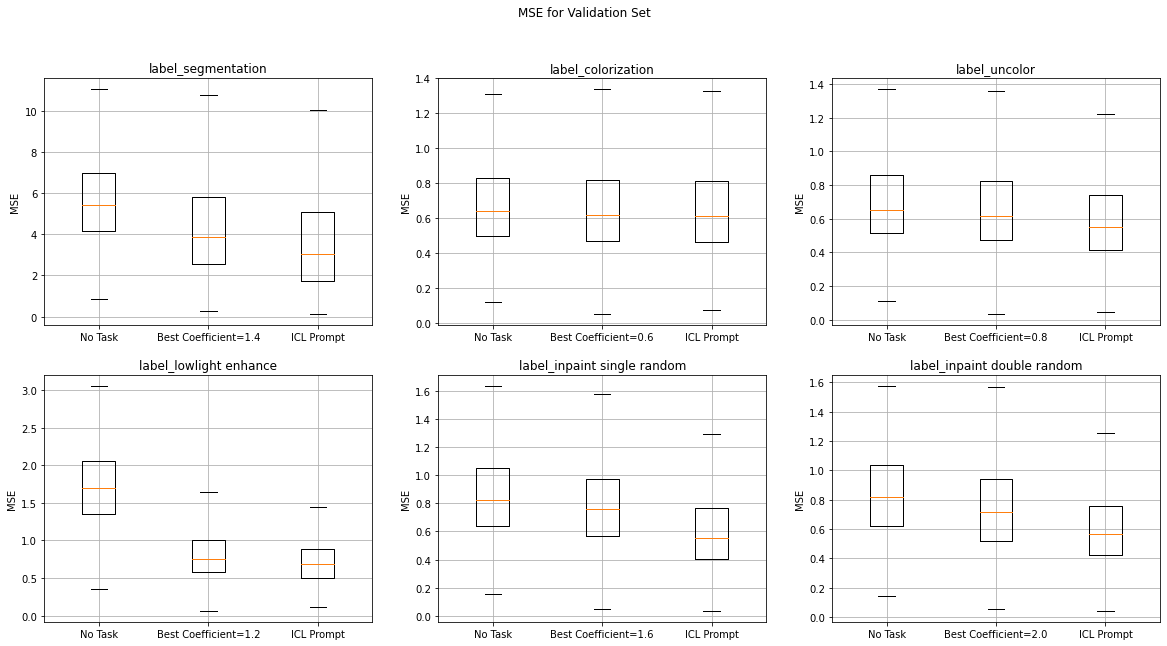